# Importing Libraries:

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

# Loading and Spliting Beans Leaf Disease Dataset:

1.   List item
2.   List item



In [ ]:
# 1. Load the Beans dataset(tfds)
(ds_train, ds_val), ds_info = tfds.load(
    'beans',
    split=['train', 'validation'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.MN2ZV4_0.1.0/beans-train.tfrecord*...:   0%|          | 0…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.MN2ZV4_0.1.0/beans-validation.tfrecord*...:   0%|        …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.MN2ZV4_0.1.0/beans-test.tfrecord*...:   0%|          | 0/…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


#Preprocess (resize and normalize):

In [ ]:
# 2. Preprocess (resize and normalize):
def preprocess(image, label):
    image = tf.image.resize(image, [150, 150])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

batch_size = 32

ds_train = ds_train.map(preprocess).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)

#Model Building:

In [ ]:
# 3. Building the model
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Compiling:

In [ ]:
# 4. Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Model Training:

In [ ]:
# 5. Train the model
history = model.fit(ds_train,validation_data=ds_val, epochs=5)

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9823 - loss: 0.0808 - val_accuracy: 0.4887 - val_loss: 7.9239
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9717 - loss: 0.1194 - val_accuracy: 0.4511 - val_loss: 6.1849
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9771 - loss: 0.0540 - val_accuracy: 0.5414 - val_loss: 6.2776
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9789 - loss: 0.0682 - val_accuracy: 0.7895 - val_loss: 1.4489
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9821 - loss: 0.0647 - val_accuracy: 0.8045 - val_loss: 0.9698


# Train and Test Accuracy

In [ ]:
# 6 (i).Train Accuracy
train_loss,train_acc = model.evaluate(ds_train)
print(f"Train Accuracy: {train_acc:.2f}")
# 6 (ii).Test Accuracy
test_loss,test_acc = model.evaluate(ds_val)
print(f"Test Accuracy: {test_acc:.2f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9415 - loss: 0.1871
Train Accuracy: 0.95
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7968 - loss: 0.9780
Test Accuracy: 0.80


# Getting One Batch From validation Dataset and Compares the Predicted class to the Actual class:







In [ ]:
7. # Get one batch from the validation dataset
for images, labels in ds_val.take(1):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = labels.numpy()
    break  # only take one batch
print("Predicted_class:", predicted_classes[1])
print("Actual_class:", actual_classes[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted_class: 1
Actual_class: 1


#Bean Leaf Disease Names:

In [ ]:
8. #Get all label names:
class_names = ds_info.features['label'].names
class_names # Data Have 3 classes

['angular_leaf_spot', 'bean_rust', 'healthy']

#

# Beans leaf images along with their index numbers:

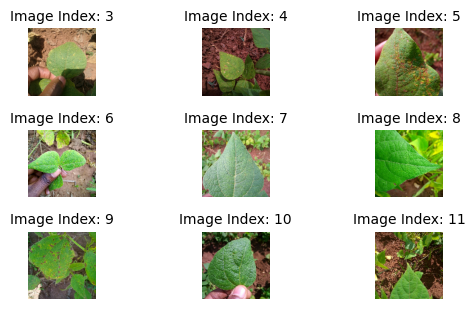

In [ ]:
9. # Showing range of image of beans leaf disease along with their index numbers:
plt.figure(figsize=(6, 3.2))
for i in range(3, 12):
    plt.subplot(3, 3, i - 2)
    plt.imshow(images[i])

    plt.title(f"Image Index: {i}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

#Predicting Bean Leaf Disease:

Enter image index (0 to 31): 5


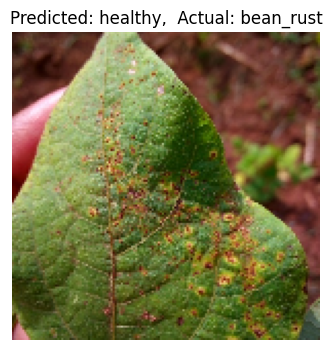

In [ ]:
10. # Predict Disease Against Actual Disease using Index:
index = int(input("Enter image index (0 to {}): ".format(len(images)-1)))

if 0 <= index < len(images):
    predicted_label = class_names[predicted_classes[index]]
    actual_label = class_names[actual_classes[index]]

    plt.figure(figsize=(6, 4))  # Adjust the figure size here (width, height)
    plt.imshow(images[index])
    plt.title(f"Predicted: {predicted_label},  Actual: {actual_label}")
    plt.axis('off')
    plt.show()
else:
    print("Invalid index. Please enter a number between 0 and", len(images)-1)